# Import Libraries

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

import os
directory_path = r"d:\semester 4\machine learning\olivetti_faces.npy"
print(os.listdir(directory_path))

['olivetti_faces.npy', 'olivetti_faces_target.npy']


# Import Data

## Review Data

In [42]:
pics = np.load(r"d:\semester 4\machine learning\olivetti_faces.npy\olivetti_faces.npy")
labels = np.load(r"d:\semester 4\machine learning\olivetti_faces.npy\olivetti_faces_target.npy")

In [43]:
print("pics: ", pics.shape)
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


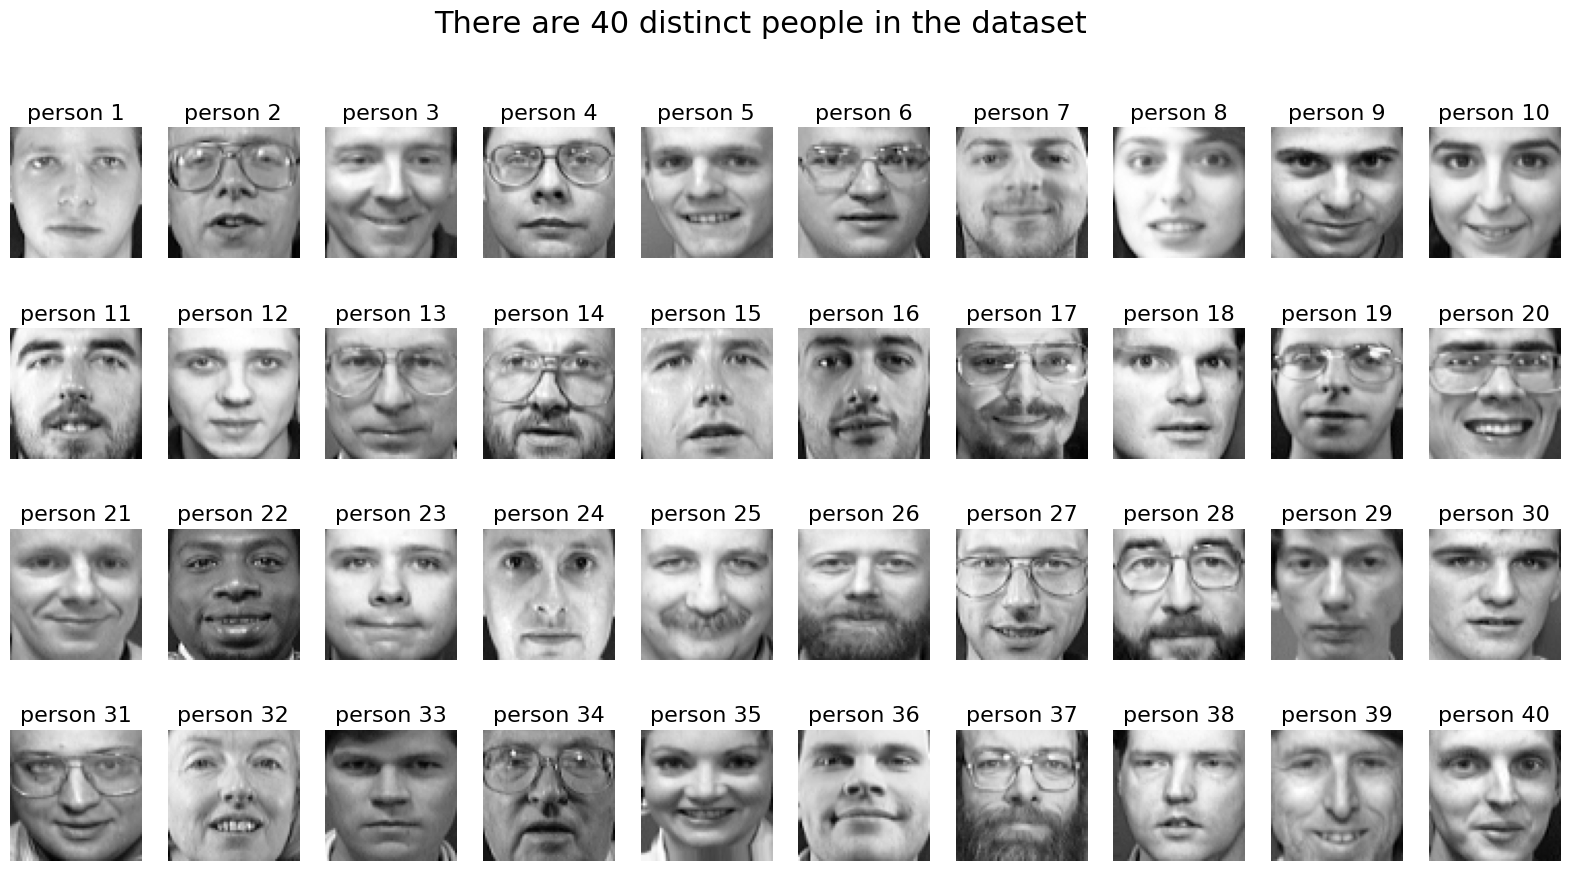

In [44]:
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=16)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct people in the dataset", fontsize=22)
plt.show()


In [45]:
Xdata = pics # store images in Xdata
Ydata = labels.reshape(-1,1) # store labels in Ydata

## Split data for train and test purposes

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.2, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 64, 64)
x_test:  (80, 64, 64)
y_train:  (320, 1)
y_test:  (80, 1)


### Reshape

In [52]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320, 1)
y_test:  (80, 1)


In [53]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
LR_accuracy = round(lr.score(x_test, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)

LR_accuracy is % 96.25


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

print("RF_accuracy is %", RF_accuracy)

list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

RF_accuracy is % 93.75


# K-NN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names.append("KNN")
list_accuracy.append(Knn_accuracy)

Knn_accuracy is % 91.25


SVM 

In [57]:
from sklearn.svm import SVC

# Initialize and train SVM classifier
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

# Calculate accuracy
svm_accuracy = round(svm.score(x_test, y_test) * 100, 2)
print("SVM accuracy is %", svm_accuracy)

# Append accuracy to the lists for comparison
list_names.append("SVM")
list_accuracy.append(svm_accuracy)


SVM accuracy is % 97.5


Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes classifier
nb = GaussianNB()
nb.fit(x_train, y_train)

# Calculate accuracy
nb_accuracy = round(nb.score(x_test, y_test) * 100, 2)
print("Naive Bayes accuracy is %", nb_accuracy)

# Append accuracy to the lists for comparison
list_names.append("Naive Bayes")
list_accuracy.append(nb_accuracy)


Naive Bayes accuracy is % 87.5


# Comparison of the Learning Methods

In [69]:
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,Gradient Boosting,38.75
1,Decision Tree,61.25
2,Naive Bayes,87.50
3,KNN,91.25
4,Random Forest,93.75
